In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def random_population(chromosome_length, mi, x_bounds, s_bounds):
    res=np.full((mi, 2, chromosome_length), 0.0)
    for num_of_child in range(mi):
        res[num_of_child, 0, :]=np.random.uniform(x_bounds[0], x_bounds[1], chromosome_length)
        res[num_of_child, 1, :]=np.random.uniform(s_bounds[0], s_bounds[1], chromosome_length)
    return res

In [17]:
def parent_selection(P, evaluation_result, lambda_param):
    indices=np.random.choice(len(evaluation_result), lambda_param)
    return P[indices]

In [18]:
def mutation(P_children, tau_param, tau_zero_param, lambda_param, chromosome_length):
    for i in range(lambda_param):
        epsilon_zero = np.random.normal(0, tau_param*tau_param, 1)
        epsilons_i = np.random.normal(0, tau_zero_param*tau_zero_param, chromosome_length) + epsilon_zero
        P_children[i, 1, :] = P_children[i, 1, :] * np.exp(epsilons_i)
        epsilons_for_first_chromosome = np.random.normal(0, 1, chromosome_length) * P_children[i, 1, :]
        P_children[i, 0, :] = P_children[i, 0, :] + epsilons_for_first_chromosome
    return P_children

In [19]:
def replacement(P, evaluation_result, P_children, children_evaluation_result, mi_param, is_mi_plus_lambda=True):
    if not is_mi_plus_lambda:
        indices=np.argsort(children_evaluation_result)[:mi_param]
        #TODO: Test this function and also other functions
        return  P_children[indices], children_evaluation_result[indices]
    else:
        all_evaluation_results=np.concatenate((evaluation_result, children_evaluation_result))
        full_population=np.concatenate((P, P_children))
        indices=np.argsort(all_evaluation_results)[:mi_param]
        return full_population[indices], all_evaluation_results[indices]

In [20]:
def ES_mi_lambda(evaluation_function, chromosome_length, mi_param, lambda_param, x_bounds, s_bounds=(0, 1), is_mi_plus_lambda=True,
                      tau_param=None, tau_zero_param=None, iterations_number=10000):
    if tau_param is None:
        tau_param=0.5/np.sqrt(2*chromosome_length)
    if tau_zero_param is None:
        tau_zero_param=0.5/np.sqrt(2*np.sqrt(chromosome_length))
    min_evaluation_results=[]
    mean_evaluation_results=[]
    max_evaluation_results=[]
    P=random_population(chromosome_length, mi_param, x_bounds, s_bounds)
    evaluation_result=evaluation_function(P[:, 0, :])
    for i in range(iterations_number):
        max_evaluation_results.append(np.max(evaluation_result))
        mean_evaluation_results.append(np.mean(evaluation_result))
        min_evaluation_results.append(np.min(evaluation_result))
        P_children=parent_selection(P, evaluation_result, lambda_param)
        P_children=mutation(P_children, tau_param, tau_zero_param, lambda_param, chromosome_length)
        children_evaluation_result=evaluation_function(P_children[:, 0, :])
        P, evaluation_result= replacement(P, evaluation_result, P_children, children_evaluation_result, mi_param, is_mi_plus_lambda)
    return P[evaluation_result.argmin(), 0, :], max_evaluation_results, mean_evaluation_results, min_evaluation_results

In [21]:
def plot_chart(P):
    plt.figure(figsize=(20, 7))
    plt.plot(P[1], label="Max results")
    plt.plot(P[2], label="Mean results")
    plt.plot(P[3], label="Min results")
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.show()

## Benchmarks:

Sphere

In [22]:
def sphere(population):
    population_size=len(population)
    results=np.zeros(population_size)
    for i in range(population_size):
        results[i] = np.sum(population[i] * population[i])
    return results
print(sphere(np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])))

[14. 77.]


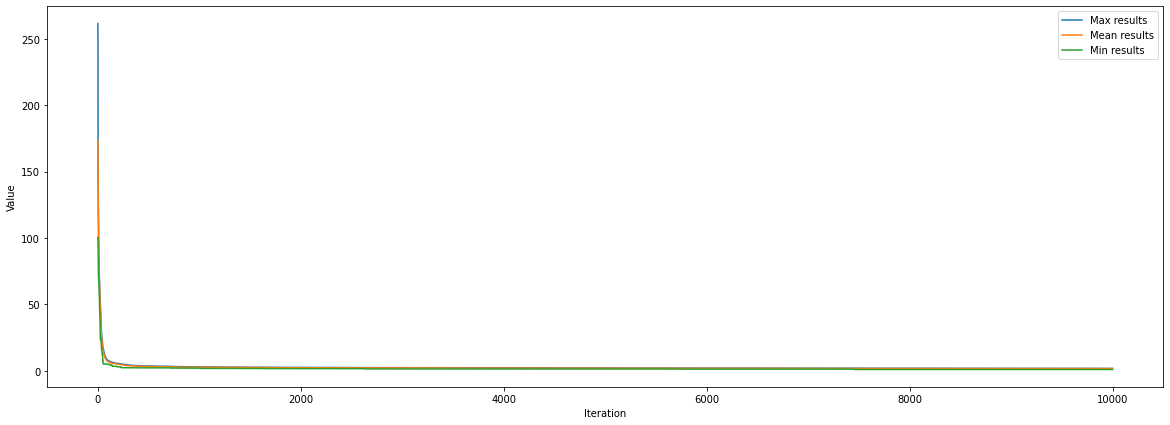

[ 0.13383349 -0.0075086   0.65054372  0.22098374 -0.02714992  0.05896812
  0.02097086  0.16043632 -0.06608013 -0.22710724  0.07073934  0.02309464
  0.18239916  0.08713489 -0.02833811  0.10772022  0.29100403  0.20841168
 -0.38587286  0.08532202]


In [23]:
res=ES_mi_lambda(sphere, 20, 100, 100, (-5.12, 5.12))
plot_chart(res)
print(res[0])

Sum squares

In [24]:
def sum_squares(population):
    population_size=len(population)
    results=np.zeros(population_size)
    for i in range(population_size):
        results[i] = np.sum(np.arange(1, len(population[i]) + 1) * population[i] * population[i])
    return results

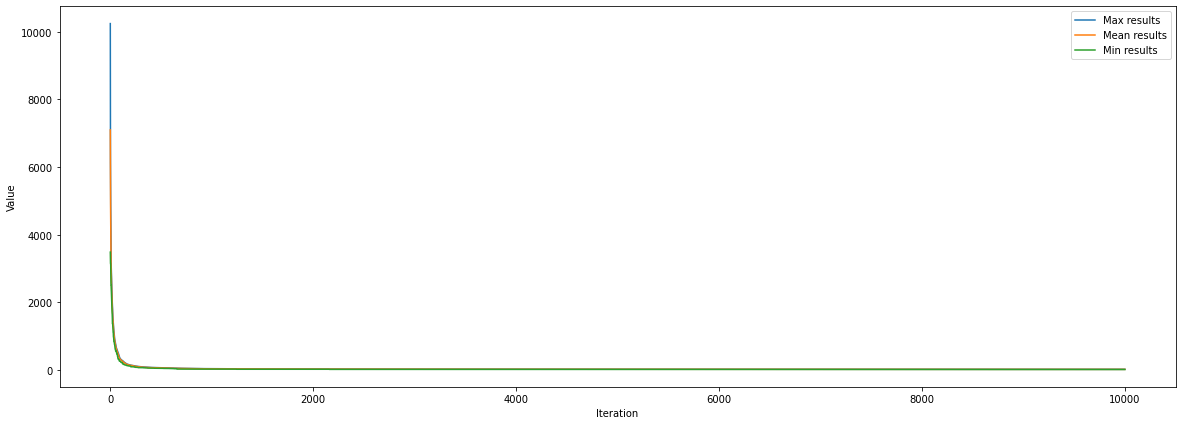

[-4.45909435e-01 -3.70608670e-01 -1.14394664e+00  3.03772419e-01
  3.57095872e-01 -3.72923044e-01 -8.34813235e-03  5.22039305e-01
 -2.01964228e-01  4.77115423e-02  8.81497277e-02 -1.50129648e-01
  1.16510584e-01 -8.35938379e-02  3.51299601e-04 -5.47577024e-02
 -2.84908924e-02 -1.33965660e-01  5.75868695e-02  7.53027983e-02]


In [25]:
res=ES_mi_lambda(sum_squares, 20, 100, 100, (-10, 10))
plot_chart(res)
print(res[0])

Griewank

In [30]:
def griewank(population):
    population_size=len(population)
    results=np.zeros(population_size)
    for i in range(population_size):
        results[i] = (np.sum(population[i]*population[i]) / 4000) - np.prod(np.cos(population[i] / np.sqrt(np.arange(1, len(population[i]) + 1)))) + 1
    return results

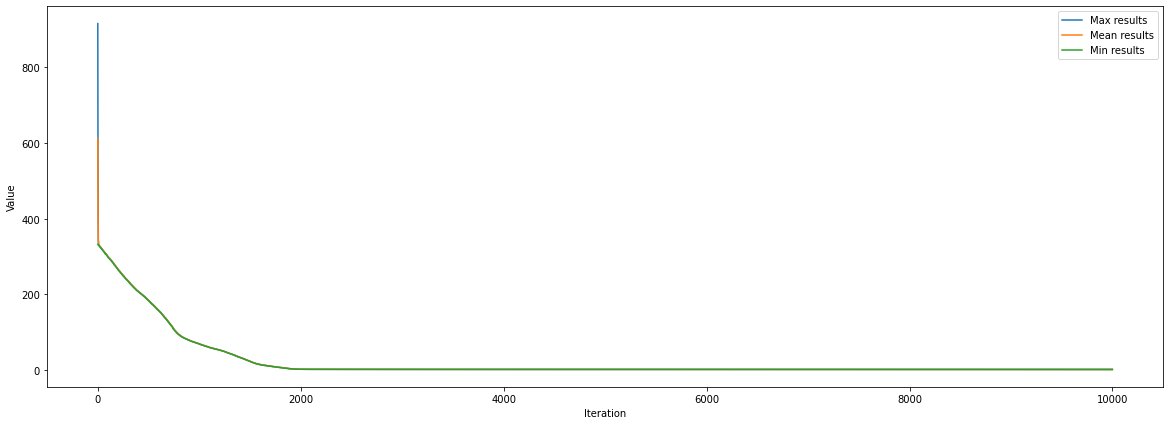

[ 2.13224250e-01  4.95132954e+00  1.30850452e-01 -5.93817280e+00
 -5.44036548e-03  1.01267905e+00 -5.44728638e-01  7.99861137e+00
  4.25882352e-01 -1.37871307e-01 -1.05520418e+01  1.97172538e+01
 -7.42425400e-01  4.20455580e-01 -1.54338841e+00 -4.26353312e-01
 -1.48604005e+00 -1.35264494e+00 -9.43870467e-01 -5.15902277e-01]


In [31]:
res=ES_mi_lambda(griewank, 20, 100, 100, (-600, 600))
plot_chart(res)
print(res[0])

Rastrigin

In [28]:
def rastrigin(population):
    population_size=len(population)
    results=np.zeros(population_size)
    for i in range(population_size):
        results[i] = 10 * len(population[i]) + np.sum(population[i] * population[i] - 10 * np.cos(2 * np.pi * population[i]))
    return results

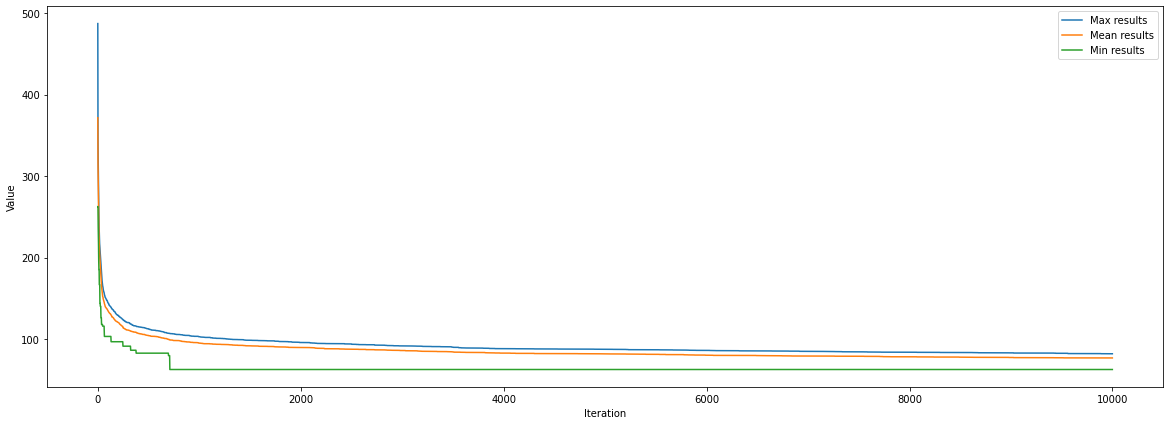

[ 1.51515163e-01  3.15791348e+00 -2.11249708e-02 -1.22010802e-01
 -1.71621891e+00  1.03188733e-01  1.11596334e+00  1.08339002e+00
  9.17576105e-01  1.09366231e-01 -3.31056019e-02 -1.13544606e+00
 -2.41589846e-02 -1.02703853e+00  8.98681015e-04  9.31550245e-01
  9.60128840e-01 -5.85226395e-02  8.42867980e-02 -1.06232740e+00]


In [29]:
res=ES_mi_lambda(rastrigin, 20, 100, 100, (-5.12, 5.12))
plot_chart(res)
print(res[0])

Rosenbrock

In [36]:
def rosenbrock(population):
    population_size=len(population)
    results=np.zeros(population_size)
    for i in range(population_size):
        results[i] = np.sum(100 * (population[i][:len(population[i]) -1] ** 2 - population[i][1:]) ** 2 + (1 - population[i][:len(population[i]) -1]) ** 2)
    return results

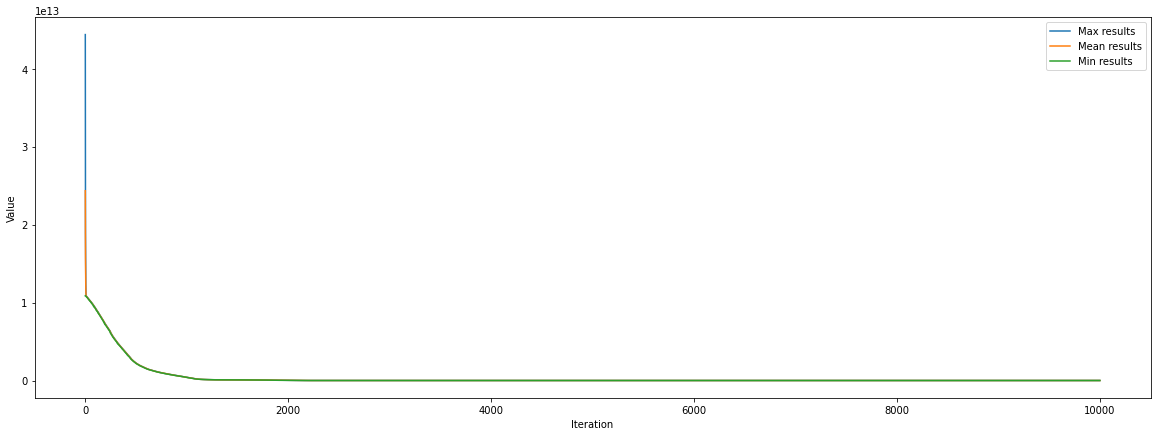

[ 6.94006993e-01 -1.23552607e+00  9.42193172e-01  1.13304776e-02
 -1.82535318e-02 -8.15703461e-01  8.23290317e-01 -7.82709679e-01
  5.36275794e-01  3.51857721e-01 -6.68395019e-01  4.23586214e-02
 -5.15617426e-01  8.77860828e-01 -1.34070822e+00  1.24156887e-01
  6.03934522e-01 -1.53899909e+00  2.73357866e+00  1.29234601e+01]


In [37]:
res=ES_mi_lambda(rosenbrock, 20, 100, 100, (-500, 500))
plot_chart(res)
print(res[0])